In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

# Loading the data set
data = pd.read_excel('./Pakistan_Covid19_Dataset.xlsx')
data.head()

,Date,Region,Area (km square),Population (Consensus 2017),COVID-19 Lockdown (1= no lockdown 2= school closure 3 = Country wide lockdown),Cumulative Cases,Cumulative tests performed,Cumulative Test positive,Discharged,Cumulative Expired (region/province wise),...,Total Admitted,Admitted Stable,Admitted Critical,Admitted Venilator,Home Quarantine.1,Recovered,Quarantine Facilities,Cumulative Quarantined,Foreign Transmission Percentage,Local Transmission Percentage
0,2020-03-11,ICT,906,2001579,1,48,80,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-11,Punjab,205345,119017465,1,61,95,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-11,Sindh,140914,47893244,1,84,171,14,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-11,KP,74521,39523371,1,20,28,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-11,KPTD,27220,4996556,1,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Count by Provinces: 
Punjab:  46
Sindh:  46
AJK:  46
Bal:  46
GB:  46
ICT:  46
KP:  46
KPTD:  12

Total Number of data count by all provinces:  334


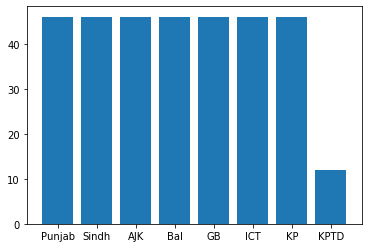

In [2]:
# counting each time each region data was collected
count_pun = 0
count_sin = 0
count_ajk=0
count_bal=0
count_gb=0
count_ict=0
count_kp=0
count_kpt=0

for i in data['Region']:
  if i == 'Punjab':
    count_pun += 1
  elif i == 'Sindh':
    count_sin += 1
  elif i == 'AJK':
    count_ajk += 1
  elif i == 'Balochistan':
    count_bal += 1
  elif i == 'GB':
    count_gb += 1
  elif i == 'ICT':
    count_ict += 1
  elif i == 'KP':
    count_kp += 1
  elif i == 'KPTD':
    count_kpt += 1

print('Data Count by Provinces: ')
print('Punjab: ', count_pun)
print('Sindh: ', count_sin)
print('AJK: ', count_ajk)
print('Bal: ', count_bal)
print('GB: ', count_gb)
print('ICT: ', count_ict)
print('KP: ', count_kp)
print('KPTD: ', count_kpt)
summer = np.sum([count_pun, count_sin, count_ajk, count_bal, count_gb, count_ict, count_kp, count_kpt])
print('\nTotal Number of data count by all provinces: ', summer)
plt.bar(['Punjab', 'Sindh', 'AJK', 'Bal', 'GB', 'ICT', 'KP', 'KPTD'],[count_pun, count_sin, count_ajk, count_bal, count_gb, count_ict, count_kp, count_kpt])
plt.show()

In [3]:
 # Provinces wise dataset
punjab = data.loc[data['Region'] == 'Punjab']
sindh = data.loc[data['Region'] == 'Sindh'] 
kptd = data.loc[data['Region'] == 'KPTD']
kpk = data.loc[data['Region'] == 'KP']
ict = data.loc[data['Region'] == 'ICT']
bal = data.loc[data['Region'] == 'Balochistan']
gb = data.loc[data['Region'] == 'GB']
ajk = data.loc[data['Region'] == 'AJK']


# population per million each region so that each region can be compared on even grounds
pop_punjab = punjab.iloc[0, 3] / 1000000
pop_sindh = sindh.iloc[0, 3] / 1000000
pop_kptd = kptd.iloc[0, 3] / 1000000
pop_kpk = kpk.iloc[0, 3] / 1000000
pop_ict = ict.iloc[0, 3] / 1000000
pop_bal = bal.iloc[0, 3] / 1000000
pop_gb = gb.iloc[0, 3] / 1000000
pop_ajk = ajk.iloc[0, 3] / 1000000

# Active cases each region per phases - per each phase means during a certain time span since data gathered changes from one phase to another
# for example in first phase kptd data is recorded but not in the rest phases
# Active cases = Cumulative cases positive - Discharged - Dead 

# active cases till phase 1
ph1_punjab = punjab[punjab.Date == '2020-03-22'].iloc[0,7] - punjab[punjab.Date == '2020-03-22'].iloc[0,8] - punjab[punjab.Date == '2020-03-22'].iloc[0,9]
ph1_sindh = sindh[sindh.Date == '2020-03-22'].iloc[0,7] - sindh[sindh.Date == '2020-03-22'].iloc[0,8] - sindh[sindh.Date == '2020-03-22'].iloc[0,9]
ph1_ict = ict[ict.Date == '2020-03-22'].iloc[0, 7] - ict[ict.Date == '2020-03-22'].iloc[0, 8] - ict[ict.Date == '2020-03-22'].iloc[0, 9]
ph1_bal = bal[bal.Date == '2020-03-22'].iloc[0, 7] - bal[bal.Date == '2020-03-22'].iloc[0, 8] - bal[bal.Date == '2020-03-22'].iloc[0, 9]
ph1_kpk = kpk[kpk.Date == '2020-03-22'].iloc[0, 7] - kpk[kpk.Date == '2020-03-22'].iloc[0, 8] - kpk[kpk.Date == '2020-03-22'].iloc[0, 9]
ph1_gb = gb[gb.Date == '2020-03-22'].iloc[0, 7] - gb[gb.Date == '2020-03-22'].iloc[0, 8] - gb[gb.Date == '2020-03-22'].iloc[0, 9]
ph1_kptd = kptd[kptd.Date == '2020-03-22'].iloc[0, 7] - kptd[kptd.Date == '2020-03-22'].iloc[0, 8] - kptd[kptd.Date == '2020-03-22'].iloc[0, 9]
ph1_ajk = ajk[ajk.Date == '2020-03-22'].iloc[0, 7] - ajk[ajk.Date == '2020-03-22'].iloc[0, 8] - ajk[ajk.Date == '2020-03-22'].iloc[0, 9]

# active cases till phase 2
ph2_punjab = punjab[punjab.Date == '2020-03-28'].iloc[0,7] - punjab[punjab.Date == '2020-03-28'].iloc[0,8] - punjab[punjab.Date == '2020-03-28'].iloc[0,9]
ph2_sindh = sindh[sindh.Date == '2020-03-28'].iloc[0,7] - sindh[sindh.Date == '2020-03-28'].iloc[0,8] - sindh[sindh.Date == '2020-03-28'].iloc[0,9]
ph2_ict = ict[ict.Date == '2020-03-28'].iloc[0, 7] - ict[ict.Date == '2020-03-28'].iloc[0, 8] - ict[ict.Date == '2020-03-28'].iloc[0, 9]
ph2_bal = bal[bal.Date == '2020-03-28'].iloc[0, 7] - bal[bal.Date == '2020-03-28'].iloc[0, 8] - bal[bal.Date == '2020-03-28'].iloc[0, 9]
ph2_kpk = kpk[kpk.Date == '2020-03-28'].iloc[0, 7] - kpk[kpk.Date == '2020-03-28'].iloc[0, 8] - kpk[kpk.Date == '2020-03-28'].iloc[0, 9]
ph2_gb = gb[gb.Date == '2020-03-28'].iloc[0, 7] - gb[gb.Date == '2020-03-28'].iloc[0, 8] - gb[gb.Date == '2020-03-28'].iloc[0, 9]
ph2_ajk = ajk[ajk.Date == '2020-03-28'].iloc[0, 7] - ajk[ajk.Date == '2020-03-28'].iloc[0, 8] - ajk[ajk.Date == '2020-03-28'].iloc[0, 9]

# active cases till phase 3
ph3_punjab = punjab[punjab.Date == '2020-04-03'].iloc[0,7] - punjab[punjab.Date == '2020-04-03'].iloc[0,8] - punjab[punjab.Date == '2020-04-03'].iloc[0,9]
ph3_sindh = sindh[sindh.Date == '2020-04-03'].iloc[0,7] - sindh[sindh.Date == '2020-04-03'].iloc[0,8] - sindh[sindh.Date == '2020-04-03'].iloc[0,9]
ph3_ict = ict[ict.Date == '2020-04-03'].iloc[0, 7] - ict[ict.Date == '2020-04-03'].iloc[0, 8] - ict[ict.Date == '2020-04-03'].iloc[0, 9]
ph3_bal = bal[bal.Date == '2020-04-03'].iloc[0, 7] - bal[bal.Date == '2020-04-03'].iloc[0, 8] - bal[bal.Date == '2020-04-03'].iloc[0, 9]
ph3_kpk = kpk[kpk.Date == '2020-04-03'].iloc[0, 7] - kpk[kpk.Date == '2020-04-03'].iloc[0, 8] - kpk[kpk.Date == '2020-04-03'].iloc[0, 9]
ph3_gb = gb[gb.Date == '2020-04-03'].iloc[0, 7] - gb[gb.Date == '2020-04-03'].iloc[0, 8] - gb[gb.Date == '2020-04-03'].iloc[0, 9]
ph3_ajk = ajk[ajk.Date == '2020-04-03'].iloc[0, 7] - ajk[ajk.Date == '2020-04-03'].iloc[0, 8] - ajk[ajk.Date == '2020-04-03'].iloc[0, 9]

# active cases till phase 4
ph4_punjab = punjab[punjab.Date == '2020-04-11'].iloc[0,7] - punjab[punjab.Date == '2020-04-11'].iloc[0,8] - punjab[punjab.Date == '2020-04-11'].iloc[0,9]
ph4_sindh = sindh[sindh.Date == '2020-04-11'].iloc[0,7] - sindh[sindh.Date == '2020-04-11'].iloc[0,8] - sindh[sindh.Date == '2020-04-11'].iloc[0,9]
ph4_ict = ict[ict.Date == '2020-04-11'].iloc[0, 7] - ict[ict.Date == '2020-04-11'].iloc[0, 8] - ict[ict.Date == '2020-04-11'].iloc[0, 9]
ph4_bal = bal[bal.Date == '2020-04-11'].iloc[0, 7] - bal[bal.Date == '2020-04-11'].iloc[0, 8] - bal[bal.Date == '2020-04-11'].iloc[0, 9]
ph4_kpk = kpk[kpk.Date == '2020-04-11'].iloc[0, 7] - kpk[kpk.Date == '2020-04-11'].iloc[0, 8] - kpk[kpk.Date == '2020-04-11'].iloc[0, 9]
ph4_gb = gb[gb.Date == '2020-04-11'].iloc[0, 7] - gb[gb.Date == '2020-04-11'].iloc[0, 8] - gb[gb.Date == '2020-04-11'].iloc[0, 9]
ph4_ajk = ajk[ajk.Date == '2020-04-11'].iloc[0, 7] - ajk[ajk.Date == '2020-04-11'].iloc[0, 8] - ajk[ajk.Date == '2020-04-11'].iloc[0, 9]

# active cases till phase 5
ph5_punjab = punjab[punjab.Date == '2020-04-18'].iloc[0,7] - punjab[punjab.Date == '2020-04-18'].iloc[0,8] - punjab[punjab.Date == '2020-04-18'].iloc[0,9]
ph5_sindh = sindh[sindh.Date == '2020-04-18'].iloc[0,7] - sindh[sindh.Date == '2020-04-18'].iloc[0,8] - sindh[sindh.Date == '2020-04-18'].iloc[0,9]
ph5_ict = ict[ict.Date == '2020-04-18'].iloc[0, 7] - ict[ict.Date == '2020-04-18'].iloc[0, 8] - ict[ict.Date == '2020-04-18'].iloc[0, 9]
ph5_bal = bal[bal.Date == '2020-04-18'].iloc[0, 7] - bal[bal.Date == '2020-04-18'].iloc[0, 8] - bal[bal.Date == '2020-04-18'].iloc[0, 9]
ph5_kpk = kpk[kpk.Date == '2020-04-18'].iloc[0, 7] - kpk[kpk.Date == '2020-04-18'].iloc[0, 8] - kpk[kpk.Date == '2020-04-18'].iloc[0, 9]
ph5_gb = gb[gb.Date == '2020-04-18'].iloc[0, 7] - gb[gb.Date == '2020-04-18'].iloc[0, 8] - gb[gb.Date == '2020-04-18'].iloc[0, 9]
ph5_ajk = ajk[ajk.Date == '2020-04-18'].iloc[0, 7] - ajk[ajk.Date == '2020-04-18'].iloc[0, 8] - ajk[ajk.Date == '2020-04-18'].iloc[0, 9]

# active cases till phase 6
ph6_punjab = punjab[punjab.Date == '2020-04-25'].iloc[0,7] - punjab[punjab.Date == '2020-04-25'].iloc[0,8] - punjab[punjab.Date == '2020-04-25'].iloc[0,9]
ph6_sindh = sindh[sindh.Date == '2020-04-25'].iloc[0,7] - sindh[sindh.Date == '2020-04-25'].iloc[0,8] - sindh[sindh.Date == '2020-04-25'].iloc[0,9]
ph6_ict = ict[ict.Date == '2020-04-25'].iloc[0, 7] - ict[ict.Date == '2020-04-25'].iloc[0, 8] - ict[ict.Date == '2020-04-25'].iloc[0, 9]
ph6_bal = bal[bal.Date == '2020-04-25'].iloc[0, 7] - bal[bal.Date == '2020-04-25'].iloc[0, 8] - bal[bal.Date == '2020-04-25'].iloc[0, 9]
ph6_kpk = kpk[kpk.Date == '2020-04-25'].iloc[0, 7] - kpk[kpk.Date == '2020-04-25'].iloc[0, 8] - kpk[kpk.Date == '2020-04-25'].iloc[0, 9]
ph6_gb = gb[gb.Date == '2020-04-25'].iloc[0, 7] - gb[gb.Date == '2020-04-25'].iloc[0, 8] - gb[gb.Date == '2020-04-25'].iloc[0, 9]
ph6_ajk = ajk[ajk.Date == '2020-04-25'].iloc[0, 7] - ajk[ajk.Date == '2020-04-25'].iloc[0, 8] - ajk[ajk.Date == '2020-04-25'].iloc[0, 9]


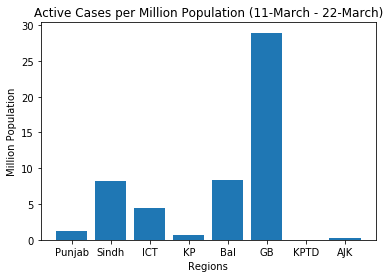

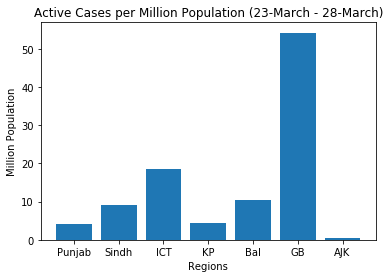

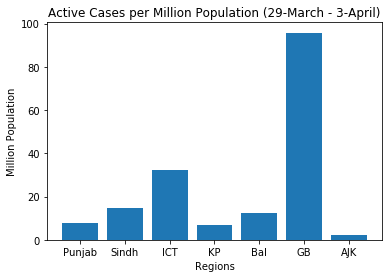

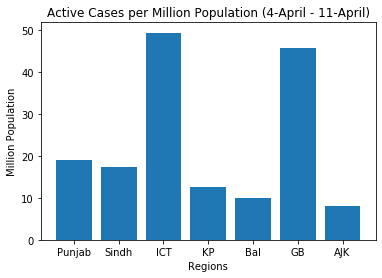

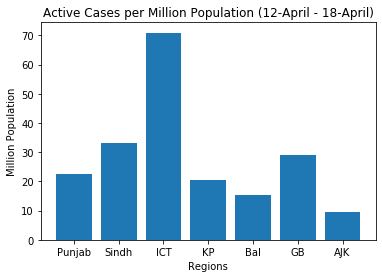

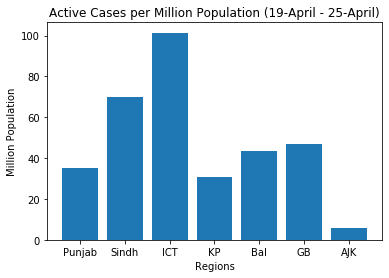

In [4]:
# active cases per million population in terms of phases 
# phase 1
ac1_punjab = ph1_punjab / pop_punjab
ac1_sindh = ph1_sindh / pop_sindh
ac1_ict = ph1_ict / pop_ict
ac1_kpk = ph1_kpk / pop_kpk
ac1_bal = ph1_bal / pop_bal
ac1_gb = ph1_gb / pop_gb
ac1_kptd = ph1_kptd / pop_kptd
ac1_ajk = ph1_ajk / pop_ajk

# phase 2
ac2_punjab = ph2_punjab / pop_punjab
ac2_sindh = ph2_sindh / pop_sindh
ac2_ict = ph2_ict / pop_ict
ac2_kpk = ph2_kpk / pop_kpk
ac2_bal = ph2_bal / pop_bal
ac2_gb = ph2_gb / pop_gb
ac2_ajk = ph2_ajk / pop_ajk

# phase 3
ac3_punjab = ph3_punjab / pop_punjab
ac3_sindh = ph3_sindh / pop_sindh
ac3_ict = ph3_ict / pop_ict
ac3_kpk = ph3_kpk / pop_kpk
ac3_bal = ph3_bal / pop_bal
ac3_gb = ph3_gb / pop_gb
ac3_ajk = ph3_ajk / pop_ajk

# phase 4
ac4_punjab = ph4_punjab / pop_punjab
ac4_sindh = ph4_sindh / pop_sindh
ac4_ict = ph4_ict / pop_ict
ac4_kpk = ph4_kpk / pop_kpk
ac4_bal = ph4_bal / pop_bal
ac4_gb = ph4_gb / pop_gb
ac4_ajk = ph4_ajk / pop_ajk

# phase 5
ac5_punjab = ph5_punjab / pop_punjab
ac5_sindh = ph5_sindh / pop_sindh
ac5_ict = ph5_ict / pop_ict
ac5_kpk = ph5_kpk / pop_kpk
ac5_bal = ph5_bal / pop_bal
ac5_gb = ph5_gb / pop_gb
ac5_ajk = ph5_ajk / pop_ajk

# phase 6
ac6_punjab = ph6_punjab / pop_punjab
ac6_sindh = ph6_sindh / pop_sindh
ac6_ict = ph6_ict / pop_ict
ac6_kpk = ph6_kpk / pop_kpk
ac6_bal = ph6_bal / pop_bal
ac6_gb = ph6_gb / pop_gb
ac6_ajk = ph6_ajk / pop_ajk

# plotting bar graph to show the number of active cases in each phase
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'KPTD', 'AJK'], [ac1_punjab, ac1_sindh, ac1_ict, ac1_kpk, ac1_bal, ac1_gb, ac1_kptd, ac1_ajk])
plt.title('Active Cases per Million Population (11-March - 22-March)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [ac2_punjab, ac2_sindh, ac2_ict, ac2_kpk, ac2_bal, ac2_gb, ac2_ajk])
plt.title('Active Cases per Million Population (23-March - 28-March)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [ac3_punjab, ac3_sindh, ac3_ict, ac3_kpk, ac3_bal, ac3_gb, ac3_ajk])
plt.title('Active Cases per Million Population (29-March - 3-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [ac4_punjab, ac4_sindh, ac4_ict, ac4_kpk, ac4_bal, ac4_gb, ac4_ajk])
plt.title('Active Cases per Million Population (4-April - 11-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [ac5_punjab, ac5_sindh, ac5_ict, ac5_kpk, ac5_bal, ac5_gb, ac5_ajk])
plt.title('Active Cases per Million Population (12-April - 18-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [ac6_punjab, ac6_sindh, ac6_ict, ac6_kpk, ac6_bal, ac6_gb, ac6_ajk])
plt.title('Active Cases per Million Population (19-April - 25-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()


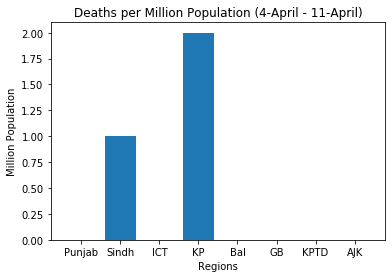

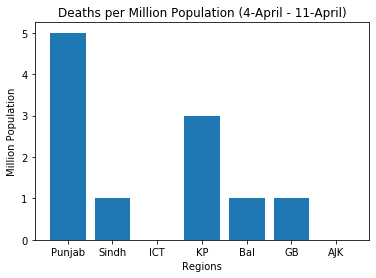

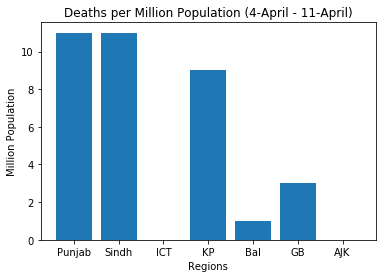

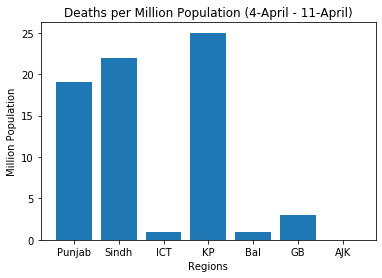

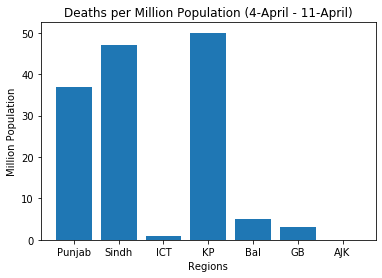

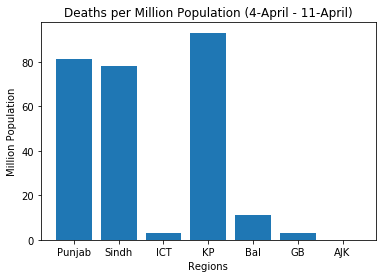

In [7]:
# Deaths per Million Population
# phase 1
d1_punjab = punjab[punjab.Date == '2020-03-22'].iloc[0,9]
d1_sindh = sindh[sindh.Date == '2020-03-22'].iloc[0,9]
d1_ict = ict[ict.Date == '2020-03-22'].iloc[0, 9]
d1_bal = bal[bal.Date == '2020-03-22'].iloc[0, 9]
d1_kpk = kpk[kpk.Date == '2020-03-22'].iloc[0, 9]
d1_gb = gb[gb.Date == '2020-03-22'].iloc[0, 9]
d1_kptd = kptd[kptd.Date == '2020-03-22'].iloc[0, 9]
d1_ajk = ajk[ajk.Date == '2020-03-22'].iloc[0, 9]

# phase 2
d2_punjab = punjab[punjab.Date == '2020-03-28'].iloc[0,9]
d2_sindh = sindh[sindh.Date == '2020-03-28'].iloc[0,9]
d2_ict = ict[ict.Date == '2020-03-28'].iloc[0, 9]
d2_bal = bal[bal.Date == '2020-03-28'].iloc[0, 9]
d2_kpk = kpk[kpk.Date == '2020-03-28'].iloc[0, 9]
d2_gb = gb[gb.Date == '2020-03-28'].iloc[0, 9]
d2_ajk = ajk[ajk.Date == '2020-03-28'].iloc[0, 9]

# phase 3
d3_punjab = punjab[punjab.Date == '2020-04-03'].iloc[0,9]
d3_sindh = sindh[sindh.Date == '2020-04-03'].iloc[0,9]
d3_ict = ict[ict.Date == '2020-04-03'].iloc[0, 9]
d3_bal = bal[bal.Date == '2020-04-03'].iloc[0, 9]
d3_kpk = kpk[kpk.Date == '2020-04-03'].iloc[0, 9]
d3_gb = gb[gb.Date == '2020-04-03'].iloc[0, 9]
d3_ajk = ajk[ajk.Date == '2020-04-03'].iloc[0, 9]

# phase 4
d4_punjab = punjab[punjab.Date == '2020-04-11'].iloc[0,9]
d4_sindh = sindh[sindh.Date == '2020-04-11'].iloc[0,9]
d4_ict = ict[ict.Date == '2020-04-11'].iloc[0, 9]
d4_bal = bal[bal.Date == '2020-04-11'].iloc[0, 9]
d4_kpk = kpk[kpk.Date == '2020-04-11'].iloc[0, 9]
d4_gb = gb[gb.Date == '2020-04-11'].iloc[0, 9]
d4_ajk = ajk[ajk.Date == '2020-04-11'].iloc[0, 9]

# phase 5
d5_punjab = punjab[punjab.Date == '2020-04-18'].iloc[0,9]
d5_sindh = sindh[sindh.Date == '2020-04-18'].iloc[0,9]
d5_ict = ict[ict.Date == '2020-04-18'].iloc[0, 9]
d5_bal = bal[bal.Date == '2020-04-18'].iloc[0, 9]
d5_kpk = kpk[kpk.Date == '2020-04-18'].iloc[0, 9]
d5_gb = gb[gb.Date == '2020-04-18'].iloc[0, 9]
d5_ajk = ajk[ajk.Date == '2020-04-18'].iloc[0, 9]

# phase 6
d6_punjab = punjab[punjab.Date == '2020-04-25'].iloc[0,9]
d6_sindh = sindh[sindh.Date == '2020-04-25'].iloc[0,9]
d6_ict = ict[ict.Date == '2020-04-25'].iloc[0, 9]
d6_bal = bal[bal.Date == '2020-04-25'].iloc[0, 9]
d6_kpk = kpk[kpk.Date == '2020-04-25'].iloc[0, 9]
d6_gb = gb[gb.Date == '2020-04-25'].iloc[0, 9]
d6_ajk = ajk[ajk.Date == '2020-03-25'].iloc[0, 9]

# plotting bar graph to show deaths per million per each phase
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'KPTD', 'AJK'], [d1_punjab, d1_sindh, d1_ict, d1_kpk, d1_bal, d1_gb, d1_kptd, d1_ajk])
plt.title('Deaths per Million Population (4-April - 11-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [d2_punjab, d2_sindh, d2_ict, d2_kpk, d2_bal, d2_gb, d2_ajk])
plt.title('Deaths per Million Population (4-April - 11-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [d3_punjab, d3_sindh, d3_ict, d3_kpk, d3_bal, d3_gb, d3_ajk])
plt.title('Deaths per Million Population (4-April - 11-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [d4_punjab, d4_sindh, d4_ict, d4_kpk, d4_bal, d4_gb, d4_ajk])
plt.title('Deaths per Million Population (4-April - 11-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [d5_punjab, d5_sindh, d5_ict, d5_kpk, d5_bal, d5_gb, d5_ajk])
plt.title('Deaths per Million Population (4-April - 11-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()
plt.figure()
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'Bal', 'GB', 'AJK'], [d6_punjab, d6_sindh, d6_ict, d6_kpk, d6_bal, d6_gb, d6_ajk])
plt.title('Deaths per Million Population (4-April - 11-April)')
plt.xlabel('Regions')
plt.ylabel('Million Population')
plt.show()

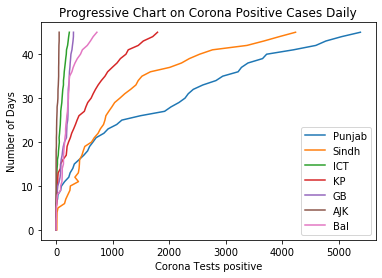

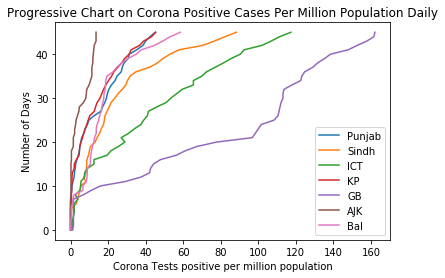

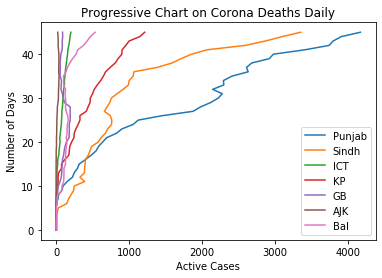

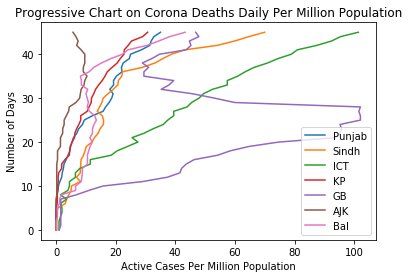

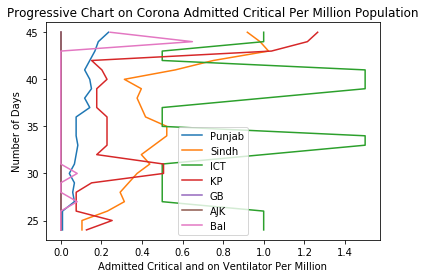

In [5]:
le = LabelEncoder()

# cumulative tests positive in punjab each day
cum_punjab = punjab.iloc[:, 7]
# active cases in punjab daily; achieved through the difference of cumalitive test positive with discharged and expired
ac_punjab = punjab.iloc[:, 7] - punjab.iloc[:, 8] - punjab.iloc[:, 9]
# active cases per million
acm_punjab = ac_punjab / pop_punjab
# cumulative cases per million
cumm_punjab = cum_punjab / pop_punjab
# indexing dates
date_punjab = punjab.iloc[:, 0]
# converting dates into integer as day numbers 0, 1, 2, 3, etc instead of regular format for ease in interpreting
date_punjab = le.fit_transform(date_punjab)
# critical cases equal to the sum of admitted critical cases and admitted ventilator
cr_punjab = punjab.iloc[24: , 16] + punjab.iloc[24:, 17]
# critical cases per million
crm_punjab = cr_punjab / pop_punjab
# the dates when critical cases were recorded
dtcr_punjab = date_punjab[24: ] 

cum_sindh = sindh.iloc[:, 7]
ac_sindh = sindh.iloc[:, 7] - sindh.iloc[:, 8] - sindh.iloc[:, 9]
acm_sindh = ac_sindh / pop_sindh
cumm_sindh = cum_sindh / pop_sindh
date_sindh = sindh.iloc[:, 0]
date_sindh = le.fit_transform(date_sindh)
cr_sindh = sindh.iloc[24: , 16] + sindh.iloc[24: , 17]
crm_sindh = cr_sindh / pop_sindh
dtcr_sindh = date_sindh[24: ]

cum_ict = ict.iloc[:, 7]
ac_ict = ict.iloc[:, 7] - ict.iloc[:, 8] - ict.iloc[:, 9]
acm_ict = ac_ict / pop_ict
cumm_ict = cum_ict / pop_ict
date_ict = ict.iloc[:, 0]
date_ict = le.fit_transform(date_ict)
cr_ict = ict.iloc[24: , 16] + ict.iloc[24: , 17]
crm_ict = cr_ict / pop_ict
dtcr_ict = date_ict[24: ]

cum_kp = kpk.iloc[:, 7]
ac_kp = kpk.iloc[:, 7] - kpk.iloc[:, 8] -kpk.iloc[:, 9]
acm_kp = ac_kp / pop_kpk
cumm_kp = cum_kp / pop_kpk
date_kp = kpk.iloc[:, 0]
date_kp = le.fit_transform(date_kp)
cr_kp = kpk.iloc[24: , 16] + kpk.iloc[24: , 17]
crm_kp = cr_kp / pop_kpk
dtcr_kp = date_kp[24: ]

cum_gb = gb.iloc[:, 7]
ac_gb = gb.iloc[:, 7] - gb.iloc[:, 8] -gb.iloc[:, 9]
acm_gb = ac_gb / pop_gb
cumm_gb = cum_gb / pop_gb
date_gb = gb.iloc[:, 0]
date_gb = le.fit_transform(date_gb)
cr_gb = gb.iloc[24: , 16] + gb.iloc[24: , 17]
crm_gb = cr_gb / pop_gb
dtcr_gb = date_gb[24: ]

cum_bal = bal.iloc[:, 7]
ac_bal = bal.iloc[:, 7] - bal.iloc[:, 8] -bal.iloc[:, 9]
acm_bal = ac_bal / pop_bal
cumm_bal = cum_bal / pop_bal
date_bal = bal.iloc[:, 0]
date_bal = le.fit_transform(date_bal)
cr_bal = bal.iloc[24: , 16] + bal.iloc[24: , 17]
crm_bal = cr_bal / pop_bal 
dtcr_bal = date_bal[24: ]

cum_ajk = ajk.iloc[:, 7]
ac_ajk = ajk.iloc[:, 7]- ajk.iloc[:, 8] -ajk.iloc[:, 9]
acm_ajk = ac_ajk / pop_ajk
cumm_ajk = cum_ajk / pop_ajk
date_ajk = ajk.iloc[:, 0]
date_ajk = le.fit_transform(date_ajk)
cr_ajk = ajk.iloc[24: , 16] + ajk.iloc[24: , 17]
crm_ajk = cr_ajk / pop_ajk
dtcr_ajk = date_ajk[24: ]

# plotting a line graph showing the increase in number of positive cases in each region
plt.plot(cum_punjab, date_punjab, label = 'Punjab')
plt.plot(cum_sindh, date_sindh, label = 'Sindh')
plt.plot(cum_ict, date_ict, label = 'ICT')
plt.plot(cum_kp, date_kp, label = 'KP')
plt.plot(cum_gb, date_gb, label = 'GB')
plt.plot(cum_ajk, date_ajk, label = 'AJK')
plt.plot(cum_bal, date_bal, label = 'Bal')
plt.ylabel("Number of Days")
plt.xlabel("Corona Tests positive")
plt.legend()
plt.title('Progressive Chart on Corona Positive Cases Daily')
plt.show()
plt.figure()

# plotting number of positive corona cases per million in each region 
plt.plot(cumm_punjab, date_punjab, label = 'Punjab')
plt.plot(cumm_sindh, date_sindh, label = 'Sindh')
plt.plot(cumm_ict, date_ict, label = 'ICT')
plt.plot(cumm_kp, date_kp, label = 'KP')
plt.plot(cumm_gb, date_gb, label = 'GB')
plt.plot(cumm_ajk, date_ajk, label = 'AJK')
plt.plot(cumm_bal, date_bal, label = 'Bal')
plt.ylabel("Number of Days")
plt.xlabel("Corona Tests positive per million population")
plt.legend()
plt.title('Progressive Chart on Corona Positive Cases Per Million Population Daily')
plt.show()
plt.figure()

# plotting number of active cases in each region
plt.plot(ac_punjab, date_punjab, label = 'Punjab')
plt.plot(ac_sindh, date_sindh, label = 'Sindh')
plt.plot(ac_ict, date_ict, label = 'ICT')
plt.plot(ac_kp, date_kp, label = 'KP')
plt.plot(ac_gb, date_gb, label = 'GB')
plt.plot(ac_ajk, date_ajk, label = 'AJK')
plt.plot(ac_bal, date_bal, label = 'Bal')
plt.ylabel("Number of Days")
plt.xlabel("Active Cases")
plt.legend()
plt.title('Progressive Chart on Corona Deaths Daily')
plt.show()

# plotting number of active cases per million in each region
plt.figure()
plt.plot(acm_punjab, date_punjab, label = 'Punjab')
plt.plot(acm_sindh, date_sindh, label = 'Sindh')
plt.plot(acm_ict, date_ict, label = 'ICT')
plt.plot(acm_kp, date_kp, label = 'KP')
plt.plot(acm_gb, date_gb, label = 'GB')
plt.plot(acm_ajk, date_ajk, label = 'AJK')
plt.plot(acm_bal, date_bal, label = 'Bal')
plt.ylabel("Number of Days")
plt.xlabel("Active Cases Per Million Population")
plt.legend()
plt.title('Progressive Chart on Corona Deaths Daily Per Million Population')
plt.show()

# plotting admitted critical and on ventilator per million in each region
plt.figure()
plt.plot(crm_punjab, dtcr_punjab, label = 'Punjab')
plt.plot(crm_sindh, dtcr_sindh, label = 'Sindh')
plt.plot(crm_ict, dtcr_ict, label = 'ICT')
plt.plot(crm_kp, dtcr_kp, label = 'KP')
plt.plot(crm_gb, dtcr_gb, label = 'GB')
plt.plot(crm_ajk, dtcr_ajk, label = 'AJK')
plt.plot(crm_bal, dtcr_bal, label = 'Bal')
plt.ylabel("Number of Days")
plt.xlabel("Admitted Critical and on Ventilator Per Million")
plt.legend()
plt.title('Progressive Chart on Corona Admitted Critical Per Million Population')
plt.show()


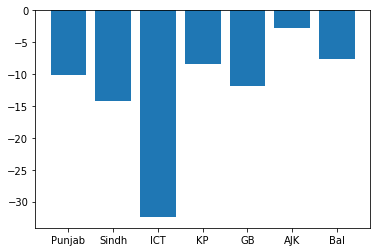

,Score
Punjab,-10.131411
Sindh,-14.225762
ICT,-32.481250
KP,-8.467840
GB,-11.850957
AJK,-2.754392
Bal,-7.578323


In [9]:
# getting mean of first 24 entries in punjab data set to calculate the mean of active cases per million population till that date
punjab_active_mean24 = np.mean(np.asarray(punjab.iloc[:24, 7] - punjab.iloc[:24, 8] + punjab.iloc[:24, 9])) / pop_punjab
# getting mean of first 24 entries of discharged field to calculate discharged per million population
punjab_discharged_mean24 = np.mean(np.asarray(punjab.iloc[:24, 8])) / pop_punjab
# calculating deaths per million population in first 24 days
punjab_deaths_mean24 = np.mean(np.asarray(punjab.iloc[:24, 9])) / pop_punjab
# calculating punjab score in first 24 days
# muliplied by 0.52 since data of 24 days are taken in consideration instead of 46 so ratio becomes 24/46 = 0.52
punjab_rat24 = (punjab_active_mean24 - punjab_discharged_mean24 + punjab_deaths_mean24) * 0.52
# calulating mean of admitted stable per million population
punjab_adstable_mean = np.mean(np.asarray(punjab.iloc[24:, 14])) / pop_punjab
# calculating mean of admitted critical per million population
punjab_adcritical_mean = np.mean(np.asarray(punjab.iloc[24:, 15])) / pop_punjab
# calculating mean of discharged per million population
punjab_discharged_mean = np.mean(np.asarray(punjab.iloc[24:, 8])) / pop_punjab
# calculating mean of admitted on ventilator per million population
punjab_advent_mean = np.mean(np.asarray(punjab.iloc[24:, 16])) / pop_punjab
# calculating mean of deaths per million after first 24 days 
punjab_deaths_mean = np.mean(np.asarray(punjab.iloc[24:, 9])) / pop_punjab
# calculating mean of active cases per million population after first 24 days 
punjab_active_mean = np.mean(np.asarray(punjab.iloc[24:, 7] - punjab.iloc[24:, 8] + punjab.iloc[24:, 9])) / pop_punjab
# calculating score after 24 days
punjab_rat25 = (punjab_active_mean - punjab_discharged_mean + punjab_deaths_mean - punjab_adstable_mean + punjab_adcritical_mean + punjab_advent_mean) * 0.48
# total score sum of first 24 and the later days 
# the reason the score was negative since active cases, deaths, admitted critical, admitted ventilator had a negative impact on the region whereas discharged and admitted stable had a positive impact on the region
punjab_rat = -(punjab_rat24 + punjab_rat25)

sindh_active_mean24 = np.mean(np.asarray(sindh.iloc[:24, 7] - sindh.iloc[:24, 8] + sindh.iloc[:24, 9])) / pop_sindh
sindh_discharged_mean24 = np.mean(np.asarray(sindh.iloc[:24, 8])) / pop_sindh
sindh_deaths_mean24 = np.mean(np.asarray(sindh.iloc[:24, 9])) / pop_sindh
sindh_rat24 = (sindh_active_mean24 - sindh_discharged_mean24 + sindh_deaths_mean24) * 0.52

sindh_adstable_mean = np.mean(np.asarray(sindh.iloc[24:, 14])) / pop_sindh
sindh_adcritical_mean = np.mean(np.asarray(sindh.iloc[24:, 15])) / pop_sindh
sindh_discharged_mean = np.mean(np.asarray(sindh.iloc[24:, 8])) / pop_sindh
sindh_advent_mean = np.mean(np.asarray(sindh.iloc[24:, 16])) / pop_sindh
sindh_deaths_mean = np.mean(np.asarray(sindh.iloc[24:, 9])) / pop_sindh
sindh_active_mean = np.mean(np.asarray(sindh.iloc[24:, 7] - sindh.iloc[24:, 8] + sindh.iloc[24:, 9])) / pop_sindh
sindh_rat25 = (sindh_active_mean - sindh_discharged_mean + sindh_deaths_mean - sindh_adstable_mean + sindh_adcritical_mean + sindh_advent_mean) * 0.48
sindh_rat = -(sindh_rat24 + sindh_rat25)


ict_active_mean24 = np.mean(np.asarray(ict.iloc[:24, 7] - ict.iloc[:24, 8] + ict.iloc[:24, 9])) / pop_ict
ict_discharged_mean24 = np.mean(np.asarray(ict.iloc[:24, 8])) / pop_ict
ict_deaths_mean24 = np.mean(np.asarray(ict.iloc[:24, 9])) / pop_ict
ict_rat24 = (ict_active_mean24 - ict_discharged_mean24 + ict_deaths_mean24) * 0.52

ict_adstable_mean = np.mean(np.asarray(ict.iloc[24:, 14])) / pop_ict
ict_adcritical_mean = np.mean(np.asarray(ict.iloc[24:, 15])) / pop_ict
ict_discharged_mean = np.mean(np.asarray(ict.iloc[24:, 8])) / pop_ict
ict_advent_mean = np.mean(np.asarray(ict.iloc[24:, 16])) / pop_ict
ict_deaths_mean = np.mean(np.asarray(ict.iloc[24:, 9])) / pop_ict
ict_active_mean = np.mean(np.asarray(ict.iloc[24:, 7] - ict.iloc[24:, 8] + ict.iloc[24:, 9])) / pop_ict
ict_rat25 = (ict_active_mean - ict_discharged_mean + ict_deaths_mean - ict_adstable_mean + ict_adcritical_mean + ict_advent_mean) * 0.48
ict_rat = -(ict_rat24 + ict_rat25)


bal_active_mean24 = np.mean(np.asarray(bal.iloc[:24, 7] - bal.iloc[:24, 8] + bal.iloc[:24, 9])) / pop_bal
bal_discharged_mean24 = np.mean(np.asarray(bal.iloc[:24, 8])) / pop_bal
bal_deaths_mean24 = np.mean(np.asarray(bal.iloc[:24, 9])) / pop_bal
bal_rat24 = (bal_active_mean24 - bal_discharged_mean24 + bal_deaths_mean24) * 0.52

bal_adstable_mean = np.mean(np.asarray(bal.iloc[24:, 14])) / pop_bal
bal_adcritical_mean = np.mean(np.asarray(bal.iloc[24:, 15])) / pop_bal
bal_discharged_mean = np.mean(np.asarray(bal.iloc[24:, 8])) / pop_bal
bal_advent_mean = np.mean(np.asarray(bal.iloc[24:, 16])) / pop_bal
bal_deaths_mean = np.mean(np.asarray(bal.iloc[24:, 9])) / pop_bal
bal_active_mean = np.mean(np.asarray(bal.iloc[24:, 7] - bal.iloc[24:, 8] + bal.iloc[24:, 9])) / pop_bal
bal_rat25 = (bal_active_mean - bal_discharged_mean + bal_deaths_mean - bal_adstable_mean + bal_adcritical_mean + bal_advent_mean) * 0.48
bal_rat = -(bal_rat24 + bal_rat25)


gb_active_mean24 = np.mean(np.asarray(gb.iloc[:24, 7] - gb.iloc[:24, 8] + gb.iloc[:24, 9])) / pop_gb
gb_discharged_mean24 = np.mean(np.asarray(gb.iloc[:24, 8])) / pop_gb
gb_deaths_mean24 = np.mean(np.asarray(gb.iloc[:24, 9])) / pop_gb
gb_rat24 = (gb_active_mean24 - gb_discharged_mean24 + gb_deaths_mean24) * 0.52

gb_adstable_mean = np.mean(np.asarray(gb.iloc[24:, 14])) / pop_gb
gb_adcritical_mean = np.mean(np.asarray(gb.iloc[24:, 15])) / pop_gb
gb_discharged_mean = np.mean(np.asarray(gb.iloc[24:, 8])) / pop_gb
gb_advent_mean = np.mean(np.asarray(gb.iloc[24:, 16])) / pop_gb
gb_deaths_mean = np.mean(np.asarray(gb.iloc[24:, 9])) / pop_gb
gb_active_mean = np.mean(np.asarray(gb.iloc[24:, 7] - gb.iloc[24:, 8] + gb.iloc[24:, 9])) / pop_gb
gb_rat25 = (gb_active_mean - gb_discharged_mean + gb_deaths_mean - gb_adstable_mean + gb_adcritical_mean + gb_advent_mean) * 0.48
gb_rat = -(gb_rat24 + gb_rat25)


kpk_active_mean24 = np.mean(np.asarray(kpk.iloc[:24, 7] - kpk.iloc[:24, 8] + kpk.iloc[:24, 9])) / pop_kpk
kpk_discharged_mean24 = np.mean(np.asarray(kpk.iloc[:24, 8])) / pop_kpk
kpk_deaths_mean24 = np.mean(np.asarray(kpk.iloc[:24, 9])) / pop_kpk
kpk_rat24 = (kpk_active_mean24 - kpk_discharged_mean24 + kpk_deaths_mean24) * 0.52

kpk_adstable_mean = np.mean(np.asarray(kpk.iloc[24:, 14])) / pop_kpk
kpk_adcritical_mean = np.mean(np.asarray(kpk.iloc[24:, 15])) / pop_kpk
kpk_discharged_mean = np.mean(np.asarray(kpk.iloc[24:, 8])) / pop_kpk
kpk_advent_mean = np.mean(np.asarray(kpk.iloc[24:, 16])) / pop_kpk
kpk_deaths_mean = np.mean(np.asarray(kpk.iloc[24:, 9])) / pop_kpk
kpk_active_mean = np.mean(np.asarray(kpk.iloc[24:, 7] - kpk.iloc[24:, 8] + kpk.iloc[24:, 9])) / pop_kpk
kpk_rat25 = (kpk_active_mean - kpk_discharged_mean + kpk_deaths_mean - kpk_adstable_mean + kpk_adcritical_mean + kpk_advent_mean) * 0.48
kpk_rat = -(kpk_rat24 + kpk_rat25)


ajk_active_mean24 = np.mean(np.asarray(ajk.iloc[:24, 7] - ajk.iloc[:24, 8] + ajk.iloc[:24, 9])) / pop_ajk
ajk_discharged_mean24 = np.mean(np.asarray(ajk.iloc[:24, 8])) / pop_ajk
ajk_deaths_mean24 = np.mean(np.asarray(ajk.iloc[:24, 9])) / pop_ajk
ajk_rat24 = (ajk_active_mean24 - ajk_discharged_mean24 + ajk_deaths_mean24) * 0.52

ajk_adstable_mean = np.mean(np.asarray(ajk.iloc[24:, 14])) / pop_ajk
ajk_adcritical_mean = np.mean(np.asarray(ajk.iloc[24:, 15])) / pop_ajk
ajk_discharged_mean = np.mean(np.asarray(ajk.iloc[24:, 8])) / pop_ajk
ajk_advent_mean = np.mean(np.asarray(ajk.iloc[24:, 16])) / pop_ajk
ajk_deaths_mean = np.mean(np.asarray(ajk.iloc[24:, 9])) / pop_ajk
ajk_active_mean = np.mean(np.asarray(ajk.iloc[24:, 7] - ajk.iloc[24:, 8] + ajk.iloc[24:, 9])) / pop_ajk
ajk_rat25 = (ajk_active_mean - ajk_discharged_mean + ajk_deaths_mean - ajk_adstable_mean + ajk_adcritical_mean + ajk_advent_mean) * 0.48
ajk_rat = -(ajk_rat24 + ajk_rat25)

# plotting score of each region	
all_regions = pd.DataFrame([punjab_rat, sindh_rat, ict_rat, kpk_rat, gb_rat, ajk_rat, bal_rat], index= ['Punjab', 'Sindh', 'ICT', 'KP', 'GB', 'AJK','Bal'], columns = ['Score'])
plt.bar(['Punjab', 'Sindh', 'ICT', 'KP', 'GB', 'AJK','Bal'],[punjab_rat, sindh_rat, ict_rat, kpk_rat, gb_rat, ajk_rat, bal_rat])
plt.show()
all_regions

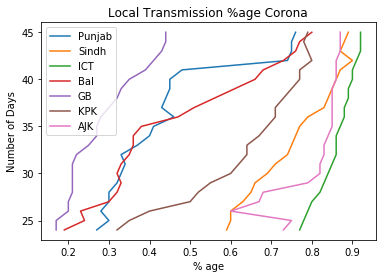

In [6]:
# indexing transmission of corona through local and foreign transmission

punjab_foreign = punjab.iloc[:, -2]
punjab_local = punjab.iloc[: , -1]

sindh_foreign = sindh.iloc[:, -2]
sindh_local = sindh.iloc[: , -1]

ict_foreign = ict.iloc[:, -2]
ict_local = ict.iloc[: , -1]

bal_foreign = bal.iloc[:, -2]
bal_local = bal.iloc[: , -1]

gb_foreign = gb.iloc[:, -2]
gb_local = gb.iloc[: , -1]

kpk_foreign = kpk.iloc[:, -2]
kpk_local = kpk.iloc[: , -1]

ajk_foreign = ajk.iloc[:, -2]
ajk_local = ajk.iloc[: , -1]

# plotting the local transmission percentage of corona 
plt.plot(punjab_local, date_punjab, label  = 'Punjab')
plt.plot(sindh_local, date_sindh, label  = 'Sindh')
plt.plot(ict_local, date_ict, label  = 'ICT')
plt.plot(bal_local, date_bal, label  = 'Bal')
plt.plot(gb_local, date_gb, label  = 'GB')
plt.plot(kpk_local, date_kp, label  = 'KPK')
plt.plot(ajk_local, date_ajk, label  = 'AJK')
plt.legend()
plt.xlabel('% age')
plt.ylabel('Number of Days')
plt.title('Local Transmission %age Corona')
plt.show()

In [7]:
# future prediction in the next 10 days
future_values = np.asarray([[46], [47], [48], [49], [50], [51], [52], [53], [54], [55]])
future_values.shape

(10, 1)

In [8]:
# for punjab
# x be the number of days
x = (date_punjab).reshape(-1, 1)
# y be the number of cumulative cases each day
y = (np.asarray(punjab.iloc[:, 7])).reshape(-1, 1)

In [ ]:
# using support vector regression model
svm = SVR()
# using different parameters so that model may choose only the best parameters from each model
kernel = ['poly', 'sigmoid' , 'rbf']
c = [0.1, 0.01, 1, 10]
gamma = [0.1, 1, 0.01]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel , 'gamma': gamma, 'C': c, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
# for punjab
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
svm_search.fit(x, y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [ ]:
# showing the best parameters for support vector machine search
svm_search.best_params_

In [ ]:
# using only the best parameters in predicting
svm_confirmed = svm_search.best_estimator_
pun_pred = svm_confirmed.predict(future_values)
pun_pred

In [ ]:
# for sindh
x = date_sindh.reshape(-1, 1)
y = np.asarray(sindh.iloc[:, 7]).reshape(-1, 1)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
svm_search.fit(x, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# using only best parameters
svm_confirmed = svm_search.best_estimator_
sin_predict = svm_confirmed.predict(future_values)
sin_predict

In [ ]:
# for ICT
x = date_ict.reshape(-1, 1)
y = np.asarray(ict.iloc[:, 7]).reshape(-1, 1)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
svm_search.fit(x, y)


In [ ]:
svm_confirmed = svm_search.best_estimator_
ict_predict = svm_confirmed.predict(future_values)
ict_predict

In [ ]:
# for kpk
x = date_kp.reshape(-1, 1)
y = np.asarray(kpk.iloc[:, 7]).reshape(-1, 1)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
svm_search.fit(x, y)

In [ ]:
svm_confirmed = svm_search.best_estimator_
kpk_predict = svm_confirmed.predict(future_values)
kpk_predict

In [ ]:
# for gb
x = date_gb.reshape(-1, 1)
y = np.asarray(gb.iloc[:, 7]).reshape(-1, 1)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
svm_search.fit(x, y)

In [ ]:
# choosing the best parameters
svm_confirmed = svm_search.best_estimator_
gb_predict = svm_confirmed.predict(future_values)
gb_predict

In [ ]:
# for balochistan
x = date_bal.reshape(-1, 1)
y = np.asarray(bal.iloc[:, 7]).reshape(-1, 1)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
svm_search.fit(x, y)

In [ ]:
# choosing the best parameters
svm_confirmed = svm_search.best_estimator_
bal_predict = svm_confirmed.predict(future_values)
bal_predict

In [ ]:
# for AJK
x = date_ajk.reshape(-1, 1)
y = np.asarray(ajk.iloc[:, 7]).reshape(-1, 1)
svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
svm_search.fit(x, y)

In [ ]:
svm_confirmed = svm_search.best_estimator_
ajk_predict = svm_confirmed.predict(future_values)
ajk_predict

In [ ]:
plt.plot(pun_pred, future_values, label = 'Punjab')
plt.plot(sin_predict, future_values, label = 'Sindh')
plt.plot(ict_predict, future_values, label = 'ICT')
plt.plot(kpk_predict, future_values, label = 'KP')
plt.plot(gb_predict, future_values, label = 'GB')
plt.plot(bal_predict, future_values, label = 'Bal')
plt.xlabel('Number of cases')
plt.ylabel('Number of days')
plt.title('Prediction for next 10 days')
plt.legend()
plt.show()